<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_EastWestAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/EastWestAirlines1.csv'

In [7]:
df1 = pd.read_csv(url)

In [8]:
df1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Dropping First ID column

In [9]:
df = df1.iloc[:,1:]
df.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0
3998,3016,0,1,1,1,0,0,0,0,1398,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [11]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


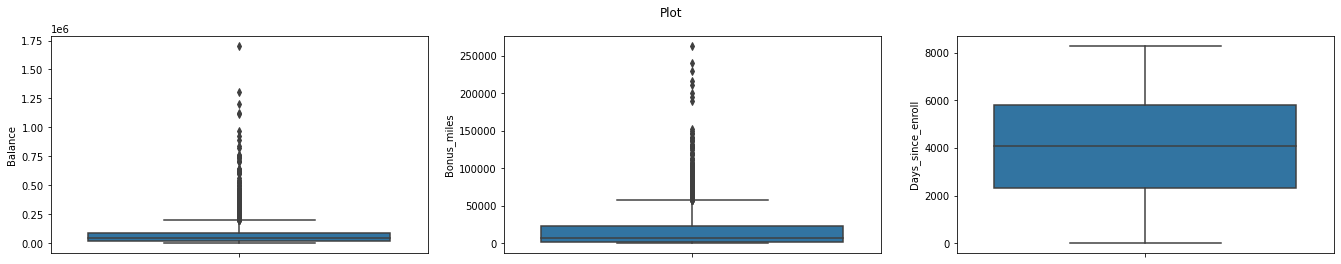

In [12]:
fig, ax2 = plt.subplots(1,3,  figsize=(23,4))
fig.suptitle('Plot')
sns.boxplot(ax=ax2[0], y=df.Balance)
sns.boxplot(ax=ax2[1], y=df.Bonus_miles)
sns.boxplot(ax=ax2[2], y=df.Days_since_enroll)
plt.show()

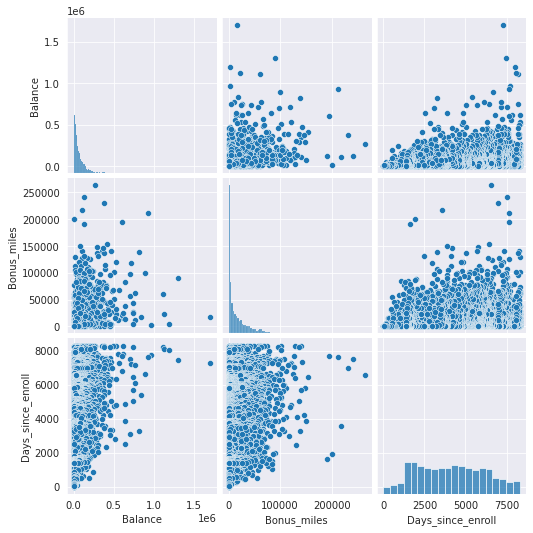

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(df[['Balance','Bonus_miles','Days_since_enroll']])

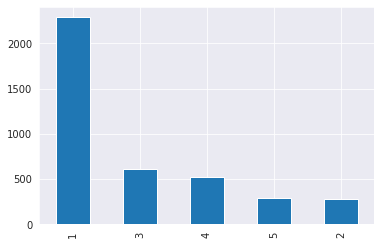

In [14]:
df['cc1_miles'].value_counts().plot(kind='bar')
#cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months

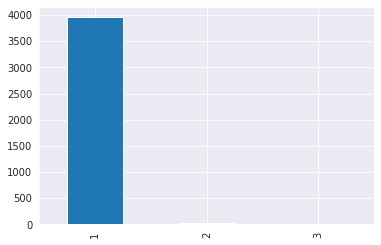

In [15]:
df['cc2_miles'].value_counts().plot(kind='bar')
# cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

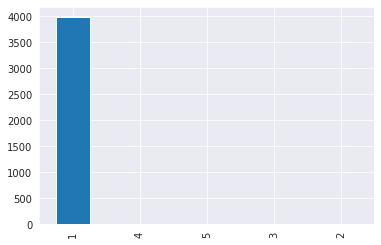

In [16]:
df['cc3_miles'].value_counts().plot(kind='bar')
#cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

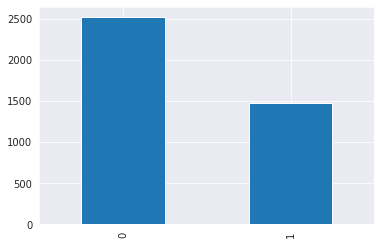

In [17]:
df['Award?'].value_counts().plot(kind='bar')

Scaling the data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
sc = MinMaxScaler()

In [20]:
scaled_df = sc.fit_transform(df.to_numpy())

In [21]:
scaled_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [22]:
scaled_df = pd.DataFrame(data=scaled_df,columns=df.columns)

In [23]:
scaled_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


Clustering - AgglomerativeClustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
ac = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")

In [26]:
y_ac = ac.fit_predict(scaled_df)

In [27]:
y_ac

array([0, 0, 0, ..., 1, 0, 0])

In [38]:
df1['AC_Clusters'] = y_ac

In [39]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,AC_Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [40]:
df1.groupby(['AC_Clusters'])['ID#'].count()

AC_Clusters
0    1710
1     946
2     808
3     535
Name: ID#, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


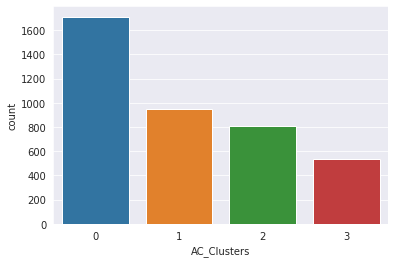

In [41]:
sns.countplot(df1.AC_Clusters)

In [42]:
df1.groupby(['AC_Clusters'])['ID#'].apply(lambda x:tuple(x))

AC_Clusters
0    (1, 2, 3, 4, 6, 14, 15, 23, 24, 25, 26, 27, 28...
1    (8, 9, 10, 18, 19, 20, 22, 29, 30, 37, 39, 40,...
2    (7, 11, 13, 31, 33, 45, 47, 57, 59, 61, 68, 72...
3    (5, 12, 16, 17, 21, 36, 42, 53, 66, 81, 82, 88...
Name: ID#, dtype: object

Clustering - Kmeans

In [33]:
from sklearn.cluster import KMeans

In [34]:
km = KMeans(n_clusters=4)

In [35]:
model = km.fit(scaled_df)

In [37]:
model.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [50]:
# we can directly use fit_predict method as well to get clusters
km.fit_predict(scaled_df)

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [43]:
df1['KMeans'] = model.labels_

In [44]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,AC_Clusters,KMeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0,1


Clustering - DBSCAN

In [47]:
from sklearn.cluster import DBSCAN

In [59]:
clustering = DBSCAN(eps=0.5, min_samples=2).fit(scaled_df)

In [60]:
clustering.labels_

array([0, 0, 0, ..., 1, 0, 0])

#from sklearn.cluster import DBSCAN
>>> import numpy as np
>>> X = np.array([[1, 2], [2, 2], [2, 3],
...               [8, 7], [8, 8], [25, 80]])
>>> clustering = DBSCAN(eps=3, min_samples=2).fit(X)
>>> clustering.labels_
array([ 0,  0,  0,  1,  1, -1])
>>> clustering
DBSCAN(eps=3, min_samples=2)


In [61]:
df1['DBSCAN'] = clustering.labels_

In [62]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,AC_Clusters,KMeans,DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1,3,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1,3,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0,1,0


In [65]:
df1['DBSCAN'].value_counts()

 0    2490
 1    1451
 6      16
 2      11
 4       9
-1       6
 3       6
 5       6
 7       2
 8       2
Name: DBSCAN, dtype: int64

In [66]:
df1['KMeans'].value_counts()

1    1897
0     808
3     673
2     621
Name: KMeans, dtype: int64

In [68]:
df1['AC_Clusters'].value_counts()

0    1710
1     946
2     808
3     535
Name: AC_Clusters, dtype: int64